# 1) Opencv HelloWorld 
OpenCV (Open Source Computer Vision Library: [opencv.org](http://opencv.org)) is an open-source library that includes several hundreds of computer vision algorithms.

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

Reading, displaying, and writing images are basic to image processing and computer vision.

* imread() - helps us read an image
* imshow() - displays an image in a window
* imwrite() - writes an image into the file directory

In [2]:
# The function cv2.imread() is used to read an image.
img_bgr = cv2.imread('../img/ditto.jpeg',1)
# image features
print(img_bgr.shape)
print(type(img_bgr))

(430, 510, 3)
<class 'numpy.ndarray'>


Beware that cv2.imread() returns a numpy array in BGR not RGB

## Plot a color image 
We plot the image directly into the notebook with matplotlib for simplicity without using the imshow function. Remember that OpenCV upload an image with BGR codification of colour, so if you want to plot with matplotlib you have to convert it into the RGB codification The method imread, imwrite and imshow indeed all work with the BGR order, so there is no need to change the order when you read an image with cv2.imread and then want to show it with cv2.imshow. Finally, BGR and RGB are not color spaces, they are just conventions for the order of the different color channels.

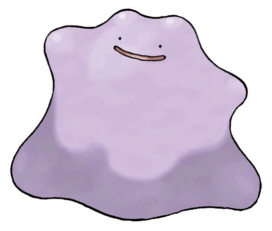

In [12]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

## More details on the imread function 
The first argument is the image name, which requires a fully qualified pathname to the file.
The second argument is an optional flag that lets you specify how the image should be represented. OpenCV offers several options for this flag, but those that are most common include:

* cv2.IMREAD_UNCHANGED  or -1
* cv2.IMREAD_GRAYSCALE  or 0
* cv2.IMREAD_COLOR  or 1

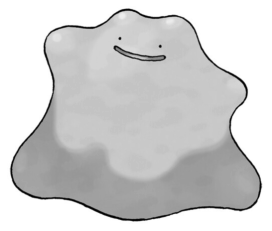

In [13]:
# The function cv2.imread() is used to read an image.
img_grayscale = cv2.imread('../img/ditto.jpeg',0)
# plot the image 
plt.imshow(img_grayscale, cmap='gray')
plt.axis('off')
plt.show()

## Save the grayscale image

In [6]:
cv2.imwrite('../img/ditto_gray.jpeg', img_grayscale)

True

## BGR codification
In OpenCV, an image is composed of pixels that are placed in a tensor. Each pixel contains a colour value as a BGR triplet. For example, a $512\times512$ image is composed of $512$ columns and $512$ rows matrix for every color channel, and the total number of pixels present in the image is equal to the number of rows multiplied by the number of columns.

A BGR triplet value contains three values that range from 0 to 255 in an 8-bit image. Where 0 means black and 255 means blue in the first matrix of the tensor (the blue channel) or means green or red in the other channels. 

In the following examples, I always converted the generated images into RGB codification for simulating the imread process.

### Representing a simple BGR image
Generating a $2\times2$ colours image with the BGR codification 

image shape: (2, 2, 3)


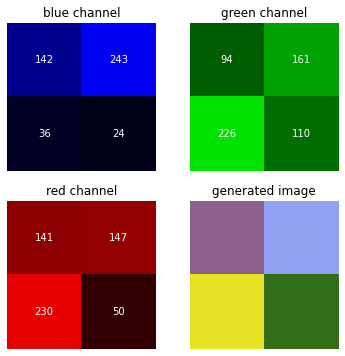

In [14]:
# generating a random images 
img_test = np.random.randint(0,255,(2,2,3), np.uint8)
print(f'image shape: {img_test.shape}')
# blue channel
img_blue = img_test.copy()
img_blue[:,:,1] = 0
img_blue[:,:,2] = 0
img_blue = cv2.cvtColor(img_blue, cv2.COLOR_BGR2RGB)
# green channel
img_green = img_test.copy()
img_green[:,:,0] = 0
img_green[:,:,2] = 0
img_green = cv2.cvtColor(img_green, cv2.COLOR_BGR2RGB)
# red channel 
img_red = img_test.copy()
img_red[:,:,0] = 0
img_red[:,:,1] = 0
img_red = cv2.cvtColor(img_red, cv2.COLOR_BGR2RGB)
# generated image 
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
# plot 
plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
plt.imshow(img_blue)
plt.title('blue channel')
plt.axis('off')
for i in range(2):
    for j in range(2):
        # RGB formatting
        c = img_blue[j,i,2] #values of the blue channel matrix 
        plt.text(i, j, str(c), va='center', ha='center', color = 'w')
plt.subplot(2,2,2)
plt.imshow(img_green)
plt.title('green channel')
plt.axis('off')
for i in range(2):
    for j in range(2):
        # RGB formatting
        c = img_green[j,i,1] #values of the green channel matrix 
        plt.text(i, j, str(c), va='center', ha='center', color = 'w')
plt.subplot(2,2,3)
plt.imshow(img_red)
plt.title('red channel')
plt.axis('off')
for i in range(2):
    for j in range(2):
        # RGB formatting
        c = img_red[j,i,0] #values of the red channel matrix 
        plt.text(i, j, str(c), va='center', ha='center', color = 'w')
plt.subplot(2,2,4)
plt.imshow(img_test)
plt.title('generated image')
plt.axis('off')
plt.show()

### Generating a black image 

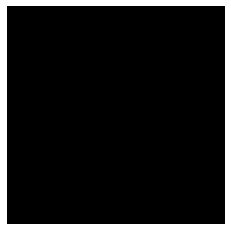

In [10]:
# with NumPy, we can easily create a sample image to study the relation of the BGR codification 
height = 512
width = 512
img_black = np.zeros((height,width,3), np.uint8)
# image generated
img_black = cv2.cvtColor(img_black, cv2.COLOR_BGR2RGB)
plt.imshow(img_black)
plt.axis('off')
plt.show()

### Generating colours image 

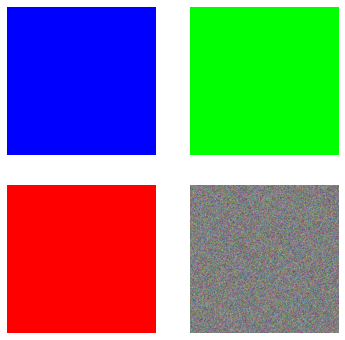

In [11]:
# blue image
img_blue = np.zeros((height,width,3), np.uint8)
img_blue[:,:] = (255,0,0)
img_blue = cv2.cvtColor(img_blue, cv2.COLOR_BGR2RGB)
# green image 
img_green = np.zeros((height,width,3), np.uint8)
img_green[:,:] = (0,255,0)
img_green = cv2.cvtColor(img_green, cv2.COLOR_BGR2RGB)
# red image 
img_red = np.zeros((height,width,3), np.uint8)
img_red[:,:] = (0,0,255)
img_red = cv2.cvtColor(img_red, cv2.COLOR_BGR2RGB)
# random colours image
img_random = np.random.randint(0,255,(height,width,3), np.uint8)
img_random = cv2.cvtColor(img_random, cv2.COLOR_BGR2RGB)
# plot images 
plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
plt.imshow(img_blue)
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(img_green)
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(img_red)
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(img_random)
plt.axis('off')
plt.show()

### Why did OpenCV choose BGR color space?
The early developers at OpenCV chose the BGR colour format because back then BGR colour format was popular among camera manufacturers and software providers. BGR was a choice made for historical reasons and now we have to live with it.